In [1]:
import numpy as np

(1900544, 2)


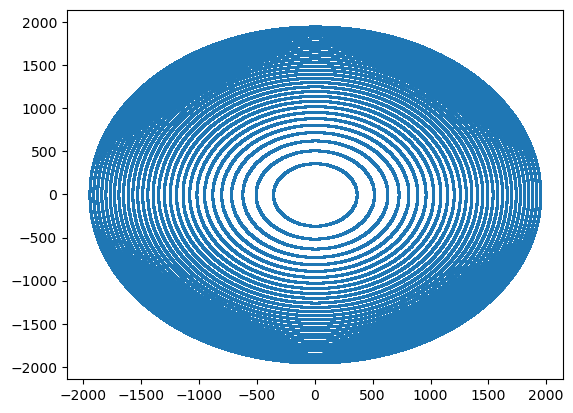

In [86]:
scaling_factor = 65536

def papernot_sample(N: int):
    u1 = np.random.randint(0, scaling_factor, N)
    u2 = np.random.randint(0, scaling_factor, N)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    sample = np.stack([r * (scaling_factor * np.cos(2 * np.pi * u2 / scaling_factor)).astype(int), r * (scaling_factor * np.sin(2 * np.pi * u2 / scaling_factor)).astype(int)], axis= 1)
    sample += (scaling_factor >> 1)
    sample //= scaling_factor
    return sample


def papernot_suport(radius: float):
    u1 = np.arange(0, scaling_factor)
    u2 = np.arange(0, scaling_factor)
    r = (scaling_factor * np.sqrt(-2 * np.log((u1 + 1) / (scaling_factor + 1)))).astype(int)
    mask = r < (scaling_factor * radius)
    theta = (scaling_factor * np.stack([np.cos(2 * np.pi * u2 / scaling_factor), np.sin(2 * np.pi * u2 / scaling_factor)], axis= 1)).astype(int)
    supp = r[mask, None, None] * theta[None, :, :]
    supp += (scaling_factor >> 1)
    supp //= scaling_factor
    return supp.reshape(-1, 2)
    
supp = papernot_suport(0.03)
print(supp.shape)

# Plot the samples in 2D
import matplotlib.pyplot as plt
plt.scatter(supp[:, 0], supp[:, 1], marker='o', s=1)
plt.show()
